# Le "quantile mapping" pour la température
Dans cette exemple, nous allons appliquer des techniques de "quantile mapping à la température"...

In [1]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

# Pour supprimer des avertissements
import warnings
warnings.filterwarnings('ignore')

### Il faut d'abord charger les données des projections et les données historiques
`data/historical_data.csv` et `data/historical_data.csv`

In [2]:
historical_data_file = Path(r'data/historical_data.csv')
projections_file = Path(r'data/projections.csv')

historical = pd.read_csv(historical_data_file, index_col=0, header = [0, 1])
projections = pd.read_csv(projections_file, index_col=0, header = [0, 1, 2, 3], skiprows=[4])

# Juste les 4 premières lignes
historical.head(4)

Zone             Q11B                                        Q12            \
Variables      P [mm]  Hsim [mm] Hobs [mm]      T [C]     P [mm] Hsim [mm]   
1990-09-01  10.492857   0.000000  0.041793  23.413880   8.340541  0.000000   
1990-10-01  27.050000   0.000000  0.132855  18.827589  26.362162  0.000000   
1990-11-01  41.857143   1.625004  0.637774  15.145339  42.221622  1.160168   
1990-12-01  78.000000  21.968107  2.738655  12.706330  79.556757  6.549536   

Zone                                  Q14A            ...       Q4B  \
Variables  Hobs [mm]      T [C]     P [mm] Hsim [mm]  ... Hobs [mm]   
1990-09-01  0.022882  23.413880   9.329167  0.000000  ...  1.107172   
1990-10-01  0.028479  18.827589  26.420833  0.000000  ...  0.264993   
1990-11-01  0.324303  15.145339  33.166667  0.342953  ...  0.082315   
1990-12-01  1.729672  12.706330  71.850000  4.230383  ...  8.134774   

Zone                           Q7                                          Q8  \
Variables       T [C]      P [mm]  Hsim [mm] Hobs [mm]      T [C]      P [mm]   
1990-09-01  23.509356   28.716541   0.000000  0.086771  22.598050   26.657143   
1990-10-01  17.065509   39.496241   0.000000  0.118819  16.201201   47.060714   
1990-11-01  12.983124   49.433083   1.002130  0.257325  12.148505   51.664286   
1990-12-01   9.451887  112.993985  13.191994  7.146044   9.057656  106.571429   

Zone                                       
Variables  Hsim [mm] Hobs [mm]      T [C]  
1990-09-01   0.00000  0.085297  22.443770  
1990-10-01   0.00000  0.116800  16.088638  
1990-11-01   0.51940  0.252953  12.258947  
1990-12-01   9.78401  7.024635   9.357754  

[4 rows x 52 columns]

In [3]:
# Juste les 4 premières lignes
projections.head(4)

Variable                                  pr  \
Experiment                        historical   
Zone                                    Q15a   
Code       CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1   
1949-01-01                               NaN   
1949-02-01                               NaN   
1949-03-01                               NaN   
1949-04-01                               NaN   

Variable                                      \
Experiment                                     
Zone                                    Q15b   
Code       CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1   
1949-01-01                               NaN   
1949-02-01                               NaN   
1949-03-01                               NaN   
1949-04-01                               NaN   

Variable                                      \
Experiment                                     
Zone                                     Q16   
Code       CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1   
1949-01-01                               NaN   
1949-02-01                               NaN   
1949-03-01                               NaN   
1949-04-01                               NaN   

Variable                                      \
Experiment                                     
Zone                                     Q17   
Code       CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1   
1949-01-01                               NaN   
1949-02-01                               NaN   
1949-03-01                               NaN   
1949-04-01                               NaN   

Variable                                      \
Experiment                                     
Zone                                     Q18   
Code       CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1   
1949-01-01                               NaN   
1949-02-01                               NaN   
1949-03-01                               NaN   
1949-04-01                               NaN   

Variable                                      \
Experiment                                     
Zone                                     Q19   
Code       CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1   
1949-01-01                               NaN   
1949-02-01                               NaN   
1949-03-01                               NaN   
1949-04-01                               NaN   

Variable                                      \
Experiment                                     
Zone                                     Q20   
Code       CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1   
1949-01-01                               NaN   
1949-02-01                               NaN   
1949-03-01                               NaN   
1949-04-01                               NaN   

Variable                                      \
Experiment                                     
Zone                                     Q21   
Code       CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1   
1949-01-01                               NaN   
1949-02-01                               NaN   
1949-03-01                               NaN   
1949-04-01                               NaN   

Variable                                      \
Experiment                                     
Zone                                    Q14b   
Code       CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1   
1949-01-01                               NaN   
1949-02-01                               NaN   
1949-03-01                               NaN   
1949-04-01                               NaN   

Variable                                      ...  \
Experiment                                    ...   
Zone                                    Q14a  ...   
Code       CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1  ...   
1949-01-01                               NaN  ...   
1949-02-01                               NaN  ...   
1949-03-01                               NaN  ...   
1949-04-01                               NaN  ...   

Variable                                        tas  \
Experiment                                    rcp85   


### Regardons maintenant les séries
Pour un bassin versant cible, comparer la précipitation historique et les projections "brutes". 

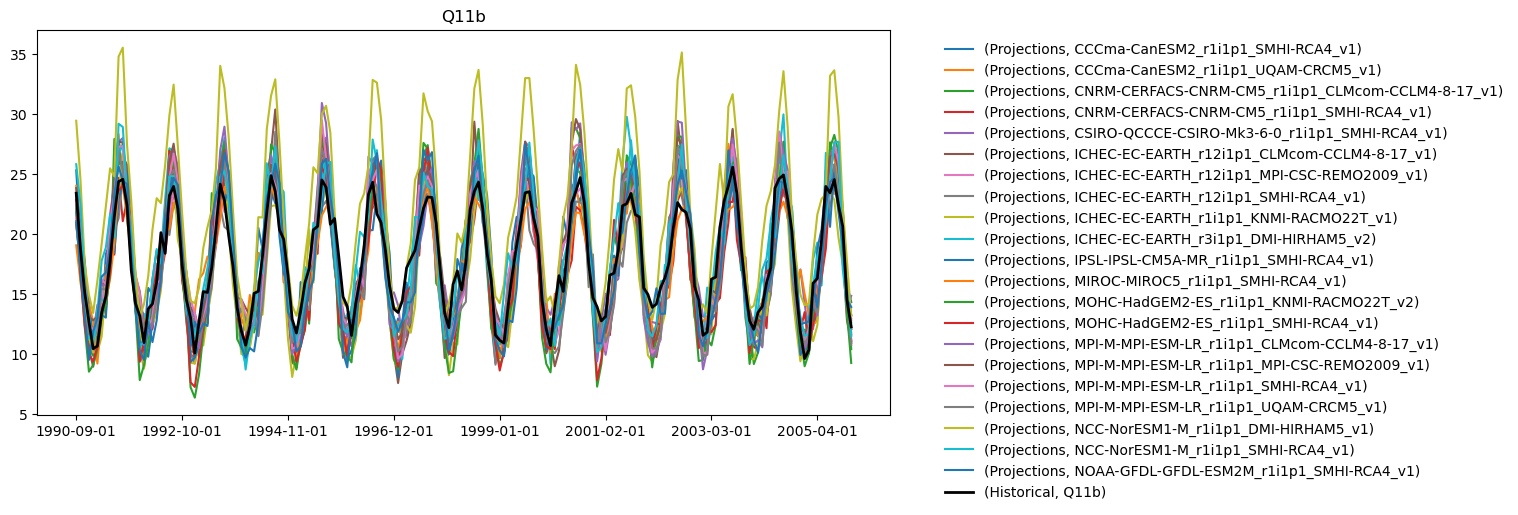

In [6]:
tas_historical = historical.loc[:, (slice(None), 'T [C]')]

# Pour convertir la lettre à la fin du code en minuscule
tas_historical.columns = [c[0][0] + c[0][1:].lower() for c in tas_historical.columns]

# Séléction du bassin versant
bv = 'Q11b'
tas_projections_bv = projections.loc[:, ('tas', 'historical', bv)]
tas_historical_bv = tas_historical.loc[:, bv]
data = pd.concat({'Historical': tas_historical_bv, 'Projections': tas_projections_bv}, axis=1).sort_index().dropna()
fig, ax = plt.subplots(figsize=(11, 5))
data.iloc[:, 1:].plot(ax=ax)
data.iloc[:, [0]].plot(ax=ax, linewidth=2, color='k')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
_ = ax.set_title(bv)
plt.show()

### Ciblons une projection en particulier
Le "Quantile Mappint" est appliqué à une projection à la fois.  
Nous avons besoin de:
- Définir le cas (rcp45 ou rcp85).
- Définir le modèle.
- Choisir le bassin versant.
- Une référence historique.
- La "projection" pour la période historique.
- La projection future.

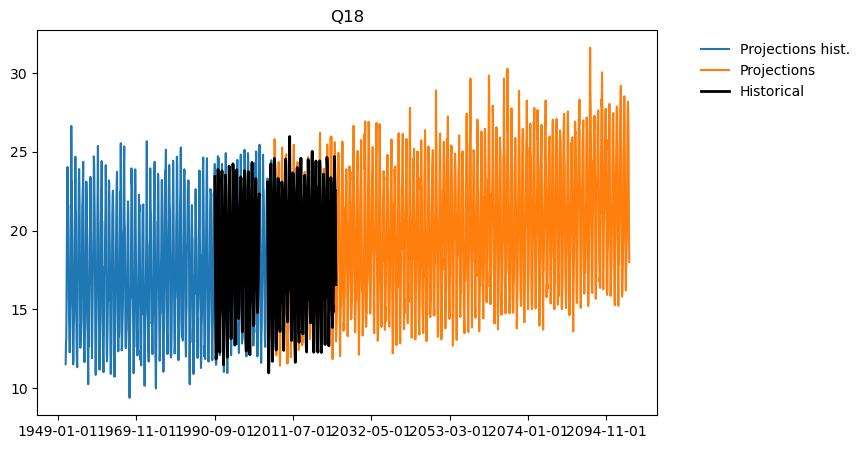

In [7]:
cas = 'rcp85'
modele = 'CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1'
bv = 'Q18'

tas_historical_bv = tas_historical.loc[:, bv]
tas_projection_historical_bv = projections.loc[:, ('tas', 'historical', bv, modele)]
tas_projection_bv = projections.loc[:, ('tas', cas, bv, modele)]

data = pd.concat({'Historical': tas_historical_bv, 'Projections hist.': tas_projection_historical_bv, 'Projections': tas_projection_bv}, axis=1).sort_index()
fig, ax = plt.subplots(figsize=(8, 5))
data.iloc[:, 1:].plot(ax=ax)
data.iloc[:, [0]].plot(ax=ax, linewidth=2, color='k')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
_ = ax.set_title(bv)
plt.show()

### Période utilisée pour caler le "Quantile Mapping"
Seulement les données historiques jusqu'á 2005 doivent être utilisées.

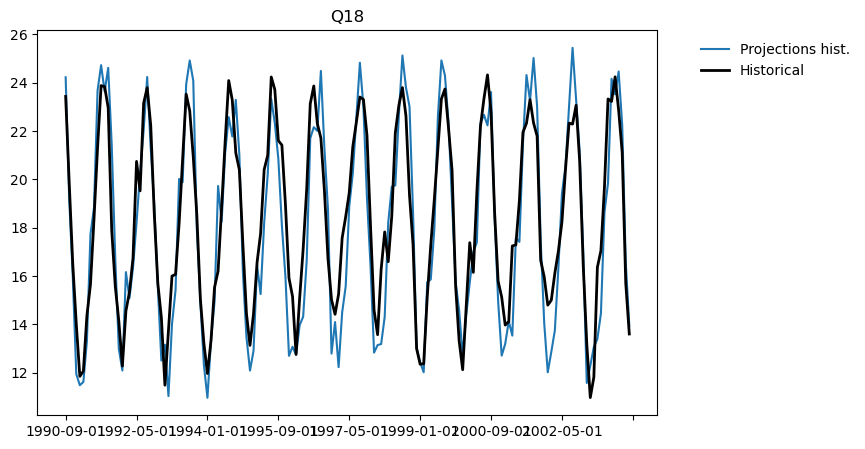

In [8]:
data_ = data.iloc[:, :2].dropna()

fig, ax = plt.subplots(figsize=(8, 5))
data_.iloc[:, [1]].plot(ax=ax)
data_.iloc[:, [0]].plot(ax=ax, linewidth=2, color='k')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
_ = ax.set_title(bv)
plt.show()

### Appliquer le "Quantile Mapping" de base 
Pour le faire, il nous faut utiliser plusiers `classes` 

In [9]:
from modules.multi_window_mapper import Multi_Window_Mapper
from modules.quantile_mapping import QuantileMapper, QuantileMapping

In [13]:
diagnostics_path = Path(r'temp/diagnostics_tas_' + cas + '_' + modele + '_' + bv)

kw_kernel = {'model': QuantileMapping, # Le type de Quantile Mapping à utiliser
            } 

qm = QuantileMapper(projection_historical=tas_projection_historical_bv, reference=tas_historical_bv,
                    kernel=Multi_Window_Mapper, kw_kernel=kw_kernel,
                    trend_window=5, # Le nombre d'années condidérées pour la moyenne glissante
                    hydrological_year_month_start=9,
                    diagnostics_path=diagnostics_path)
qm.map()
corrected = qm.apply(tas_projection_bv).dropna()
corrected

2006-01-01    13.602103
2006-02-01    16.796274
2006-03-01    16.007948
2006-04-01    15.883584
2006-05-01    18.044320
                ...    
2100-08-01    24.323363
2100-09-01    24.323363
2100-10-01    23.738020
2100-11-01    19.670961
2100-12-01    18.291136
Length: 1140, dtype: float64

### Regarder les diagnostiques
Ils sont sur un dossier `temp/diagnostics_variable_cas_modele_bv` que nous avons indiqué juste avant.

#### Commençons par les quantiles...

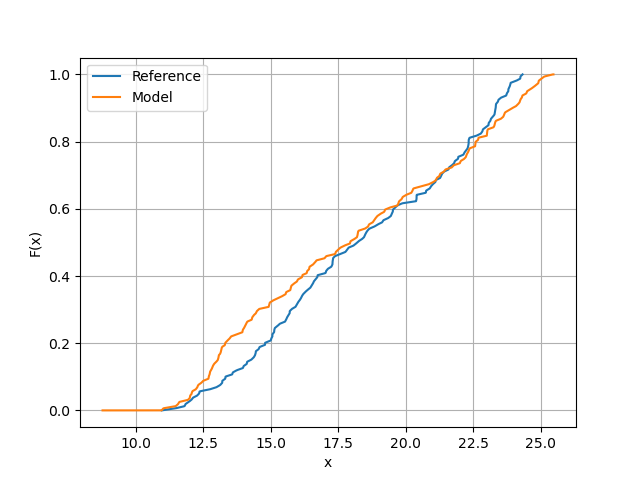

In [14]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(diagnostics_path / 'quantile_1.png')

#### Les tendences
C'est important que la référence (les données historiques) colle avec le "mapped" (projection corrigée)

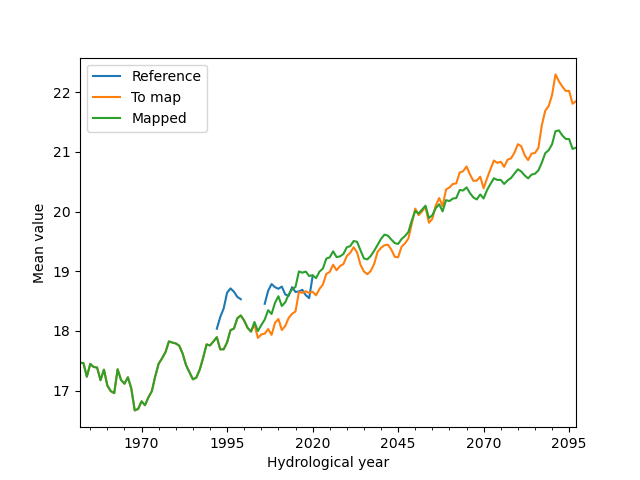

In [15]:
Image(diagnostics_path / 'trend.png')

#### Les tendences en termes de variabilité
Maintenant, nous regardons la moyenne mobile de l'écart-type.
C'est aussi important que la référence (les données historiques) colle avec le "mapped" (projection corrigée)

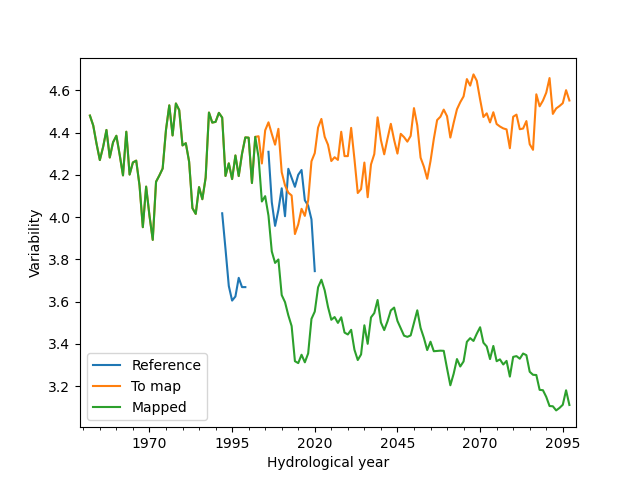

In [16]:
Image(diagnostics_path / 'trend std.png')

#### Finallement, la saisonalité
Ici, la référence et le "mapped" doivent être le plus proches possible, y compris leur intervale de confiance.

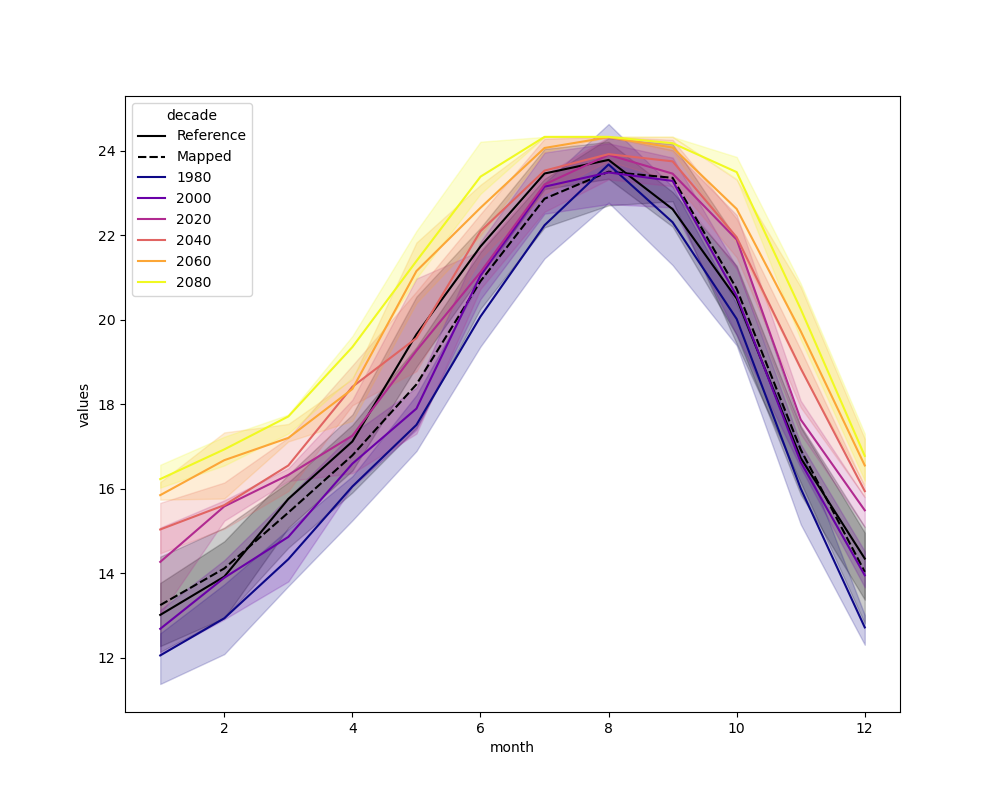

In [17]:
Image(diagnostics_path / 'yearly.png')

### Détectez-vous des problèmes?